<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 24</h1>
</div>

# 1. Rust: Hash maps with custom types
# 2. Representing graphs

# <font color="red">1. Rust: Hash maps with custom types</font>
# 2. Representing graphs

## Hashing with custom types in Rust

Required for hashing:
  1. check if $k_1,k_2 \in {}$`K` equal
  1. compute a hash function for elements of `K`

In [6]:
use std::collections::HashMap;

struct Point {
    x:i64,
    y:i64,
}

let point = Point{x:2,y:-1};

let mut elevation = HashMap::new();

elevation.insert(point,2.3);


Error: the trait bound `Point: Eq` is not satisfied

Error: the trait bound `Point: Hash` is not satisfied

Need three traits:
  * `Eq`
  * `PartialEq`
  * `Hash`

Default implementation:

In [7]:
use std::collections::HashMap;

#[derive(Debug,Hash,Eq,PartialEq)]
struct DistanceKM(i64);

let mut tired = HashMap::new();

tired.insert(DistanceKM(30),true);
tired

{DistanceKM(30): true}

### Not all basic types support the Eq and Hash traits (f32 and f64 do not).  The reasons have to do with the NaN and Infinity problems we discussed last time.  

* If you find yourself needing floats as keys consider converting the float to a collection of integers

In [8]:
:dep num-traits="0.2"

In [9]:
use num_traits::Float;

let num:f64 = 3.64;  // Some float
let base:f64 = 2.0;
// (8388608, -22, 1)
let (mantissa, exponent, sign) = Float::integer_decode(num);
println!("{} {} {}", mantissa, exponent, sign);
let sign_f:f64 = sign as f64;
let mantissa_f:f64 = mantissa as f64;
let exponent_f:f64 = base.powf(exponent as f64);

// 1 * 8388608 * 2^(-22) == 2
let new_num:f64 = sign_f * mantissa_f * exponent_f;

println!("{} {}", num, new_num);


8196551321814303 -51 1
3.64 3.64


## `HashSet<K>` 

* No value associated with keys
* Just a set of items
* Same implementation

In [17]:
use std::collections::HashSet;

// create
let mut covid = HashSet::new();

// insert values
for i in 2019..=2022 {
    covid.insert(i);
};

In [18]:
// iterate over values in the set
for year in &covid {
    print!("{} ",year);
}
println!();

2022 2019 2020 2021 


In [19]:
covid.get(&2015)

None

In [20]:
covid.get(&2021)

Some(2021)

In [21]:
covid.insert(2020);
for year in &covid {
    print!("{} ",year);
}
println!();

2022 2019 2020 2021 


# 1. Rust: Hash maps with custom types
# <font color="red">2. Representing graphs</font>

## Why are graphs useful?

Lots of problems reduce to graph problems
* The Internet is a graph (Shortest path, min/max flow)
* The Web is a graph (crawlers)
* Social networks are graphs (graph degrees, k-connectivity)
* Logistics hubs and transportation are graphs (Traveling salesman, subway and bus schedules)
* Computer scheduling, GSM frequency scheduling (Graph coloring)
* Medical school residency assignments (stable marriage algorithm)
* And many others....

## What types of graphs are there?

* Directed vs Undirected
* Weighted
* Special
  * Tree (no cycles)
  * Rooted tree (very common and useful, includes heaps, b-trees, tries etc).
  * DAG (most workflows are DAGs)
  * Bi-partite (can be separate to 2 sides with all edges crossing sides)
  * Cliques

## Graph representations: various options

* What information we want to access

* What efficiency required

<div align="center">
    <img src="graph.svg" alt="[sample image]">
</div>

**Today:**

* Edges List
* Vertex Adjacency lists 
* Vertex Adjacency matrix 



Focus on undirected graphs:
 * easy to adjust for directed

## Edges List
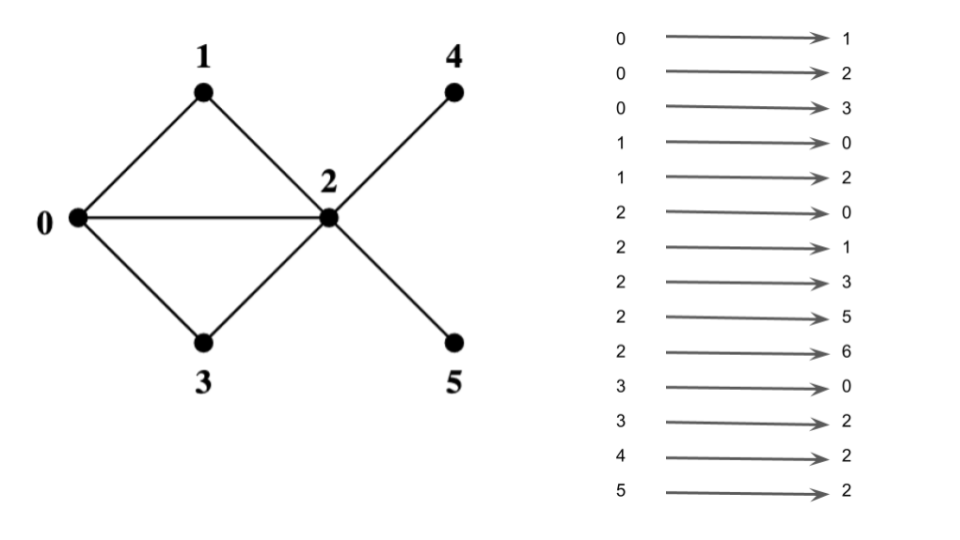

* List of directed or undirected edges
* Can be sorted/ordered for easier access/discovery
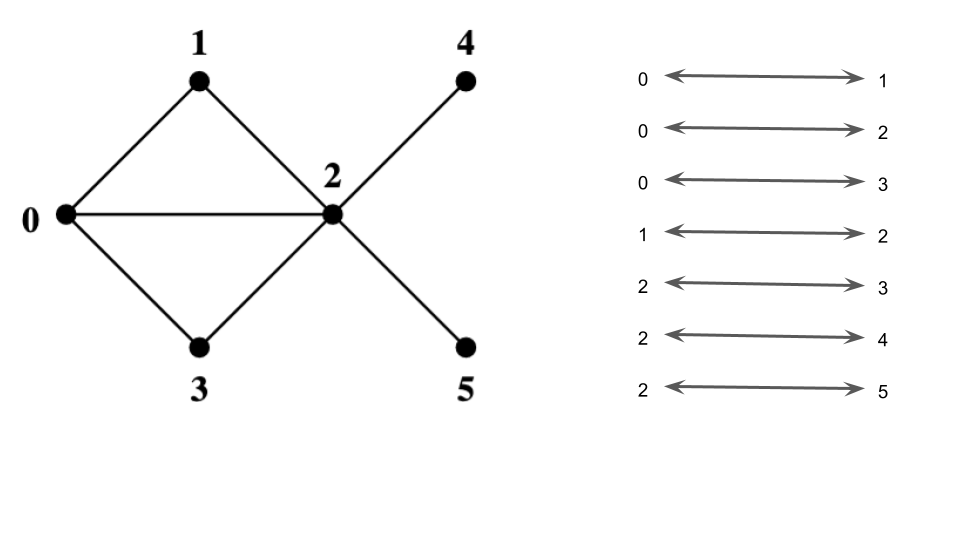

In [13]:
// number of vertices
let n : usize = 6;

// list of edges
let edges : Vec<(usize,usize)> = vec![(0,1), (0,2), (0,3), (1,2), (2,3), (2,4), (2,5)];
println!("{:?}", edges);
println!("{:?}",edges.binary_search(&(2,3)));
println!("{:?}",edges.binary_search(&(1,3)));

[(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (2, 4), (2, 5)]
Ok(4)
Err(4)


## Adjacency lists

For each vertex, store the list of its neighbors

<br>
<div align="center">
<img src="sparse.svg" alt="[sample graph]">
</div>

Collection:
 * classical approach: linked list
 * vectors

In [15]:
let mut graph_list : Vec<Vec<usize>> = vec![vec![];n];
for (v,w) in edges.iter() {
    graph_list[*v].push(*w);
    graph_list[*w].push(*v);
};
for i in 0..graph_list.len() {
    println!("{}: {:?}", i, graph_list[i]);
};
println!("{:?}", graph_list[2].binary_search(&3));
println!("{:?}", graph_list[1].binary_search(&3));

0: [1, 2, 3]
1: [0, 2]
2: [0, 1, 3, 4, 5]
3: [0, 2]
4: [2]
5: [2]
Ok(2)
Err(2)


## Adjacency matrix

* $n$ vertices

* $n \times n$ matrix

* For each pair of vertices, store a boolean value: edge present or not

<div align="center">
<img src="dense.svg" alt="sample dense graph">
</div>

In [16]:
let mut graph_matrix = vec![vec![false;n];n];
for (v,w) in edges.iter() {
    graph_matrix[*v][*w] = true;
    graph_matrix[*w][*v] = true; 
};
for row in &graph_matrix {
    for entry in row.iter() {
        print!(" {} ",if *entry {"1"} else {"0"});
    }
    println!("");
};
println!("{}", graph_matrix[2][3]);
println!("{}", graph_matrix[1][3]);

 0  1  1  1  0  0 
 1  0  1  0  0  0 
 1  1  0  1  1  1 
 1  0  1  0  0  0 
 0  0  1  0  0  0 
 0  0  1  0  0  0 
true
false
